<a href="https://colab.research.google.com/github/renatossilva/DoctoralThesis/blob/main/trab_Renato_Dendograms_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and stuff

In [ ]:
# Geral
import pandas as pd
import numpy as np

# Especifico
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#Plot
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
file = '/content/drive/'
drive.mount(file)

Mounted at /content/drive/


## Seleção de pasta

In [ ]:
# Executar se no PC do Vitor
%cd /content/drive/My Drive/Trabalho-Renato

/content/drive/My Drive/Trabalho-Renato


In [ ]:
# Executar se no PC do Renato
%cd /content/drive/My Drive/Tese/AI_tests

# Carregando os dados

In [ ]:
# Data
file_name = ['20011207.io', '20011907.io']
col_names = ['relatorio', 'time', 'BPG_type', 'anomaly', 'AS_origin', 'relevance', 'relevance_avg', 'threat', 'threat_avg', 'repetitions', 'length', 'origin_type']
df_normal = pd.read_csv(file_name[0], sep='|', names=col_names)
df_attack = pd.read_csv(file_name[1], sep='|', names=col_names)
df_both = pd.concat([df_normal, df_attack])
df_normal['time'] = pd.to_datetime(df_normal['time'], format='%m/%d/%y %H:%M:%S')
df_attack['time'] = pd.to_datetime(df_attack['time'], format='%m/%d/%y %H:%M:%S')
df_both['time'] = pd.to_datetime(df_both['time'], format='%m/%d/%y %H:%M:%S')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_normal

,relatorio,time,BPG_type,anomaly,AS_origin,relevance,relevance_avg,threat,threat_avg,repetitions,length,origin_type
0,BGP4MP,2001-07-12 12:04:59,A,0,808,0.000090,0.027984,0.0,5.635023e-06,0,5,2
1,BGP4MP,2001-07-12 12:04:59,A,0,81,0.001086,0.014434,0.0,5.884741e-06,0,4,0
2,BGP4MP,2001-07-12 12:04:59,A,0,1580,0.000086,0.001028,0.0,1.731422e-07,0,6,2
3,BGP4MP,2001-07-12 12:04:59,A,0,1580,0.000086,0.001028,0.0,1.731422e-07,0,6,2
4,BGP4MP,2001-07-12 12:04:59,A,0,9486,0.000079,0.018371,0.0,3.521889e-06,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43677,BGP4MP,2001-07-12 15:19:57,A,0,2820,0.000000,0.102075,0.0,1.835229e-05,0,5,0
43678,BGP4MP,2001-07-12 15:19:57,A,0,2820,0.000000,0.102075,0.0,1.835229e-05,0,5,0
43679,BGP4MP,2001-07-12 15:19:57,A,0,2820,0.000000,0.102075,0.0,1.835229e-05,0,5,0
43680,BGP4MP,2001-07-12 15:19:57,A,0,2820,0.000000,0.102075,0.0,1.835229e-05,0,5,0


In [ ]:
df_attack

,relatorio,time,BPG_type,anomaly,AS_origin,relevance,relevance_avg,threat,threat_avg,repetitions,length,origin_type
0,BGP4MP,2001-07-19 12:06:26,A,1,8670,0.000122,0.002142,0.000000e+00,0.000011,0,6,0
1,BGP4MP,2001-07-19 12:06:26,A,1,702,0.005208,0.001519,4.869624e-07,0.000001,0,4,0
2,BGP4MP,2001-07-19 12:06:26,A,1,702,0.005208,0.001519,4.869624e-07,0.000001,0,4,0
3,BGP4MP,2001-07-19 12:06:26,A,1,702,0.005208,0.001519,4.869624e-07,0.000001,0,4,0
4,BGP4MP,2001-07-19 12:06:26,A,1,702,0.005208,0.001519,4.869624e-07,0.000001,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
78479,BGP4MP,2001-07-19 15:21:16,A,1,19077,0.000014,0.015091,0.000000e+00,0.000001,0,5,0
78480,BGP4MP,2001-07-19 15:21:16,A,1,19077,0.000014,0.015091,0.000000e+00,0.000001,0,5,0
78481,BGP4MP,2001-07-19 15:21:16,A,1,19077,0.000014,0.015091,0.000000e+00,0.000001,0,5,0
78482,BGP4MP,2001-07-19 15:21:16,A,1,19077,0.000014,0.015091,0.000000e+00,0.000001,0,5,0


In [ ]:
df_both

,relatorio,time,BPG_type,anomaly,AS_origin,relevance,relevance_avg,threat,threat_avg,repetitions,length,origin_type
0,BGP4MP,2001-07-12 12:04:59,A,0,808,0.000090,0.027984,0.0,5.635023e-06,0,5,2
1,BGP4MP,2001-07-12 12:04:59,A,0,81,0.001086,0.014434,0.0,5.884741e-06,0,4,0
2,BGP4MP,2001-07-12 12:04:59,A,0,1580,0.000086,0.001028,0.0,1.731422e-07,0,6,2
3,BGP4MP,2001-07-12 12:04:59,A,0,1580,0.000086,0.001028,0.0,1.731422e-07,0,6,2
4,BGP4MP,2001-07-12 12:04:59,A,0,9486,0.000079,0.018371,0.0,3.521889e-06,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
78479,BGP4MP,2001-07-19 15:21:16,A,1,19077,0.000014,0.015091,0.0,1.114295e-06,0,5,0
78480,BGP4MP,2001-07-19 15:21:16,A,1,19077,0.000014,0.015091,0.0,1.114295e-06,0,5,0
78481,BGP4MP,2001-07-19 15:21:16,A,1,19077,0.000014,0.015091,0.0,1.114295e-06,0,5,0
78482,BGP4MP,2001-07-19 15:21:16,A,1,19077,0.000014,0.015091,0.0,1.114295e-06,0,5,0


# Criação dos Dendogramas

In [ ]:
chosen_cols = ['relevance', 'relevance_avg', 'threat', 'threat_avg', 'repetitions', 'length']

In [ ]:
scaler_normal = MinMaxScaler()
scaler_attack = MinMaxScaler()
scaler_both = MinMaxScaler()

X_normal = scaler_normal.fit_transform(df_normal[chosen_cols])
X_attack = scaler_attack.fit_transform(df_attack[chosen_cols])
X_both = scaler_both.fit_transform(df_both[chosen_cols])

In [ ]:
X_normal_sample = X_normal[np.random.choice(X_normal.shape[0], 5000, replace=False), :]
X_attack_sample = X_attack[np.random.choice(X_attack.shape[0], 5000, replace=False), :]
X_both_sample = X_both[np.random.choice(X_both.shape[0], 10000, replace=False), :]

In [ ]:
plt.rcParams['figure.figsize'] = (20, 12)

Normal

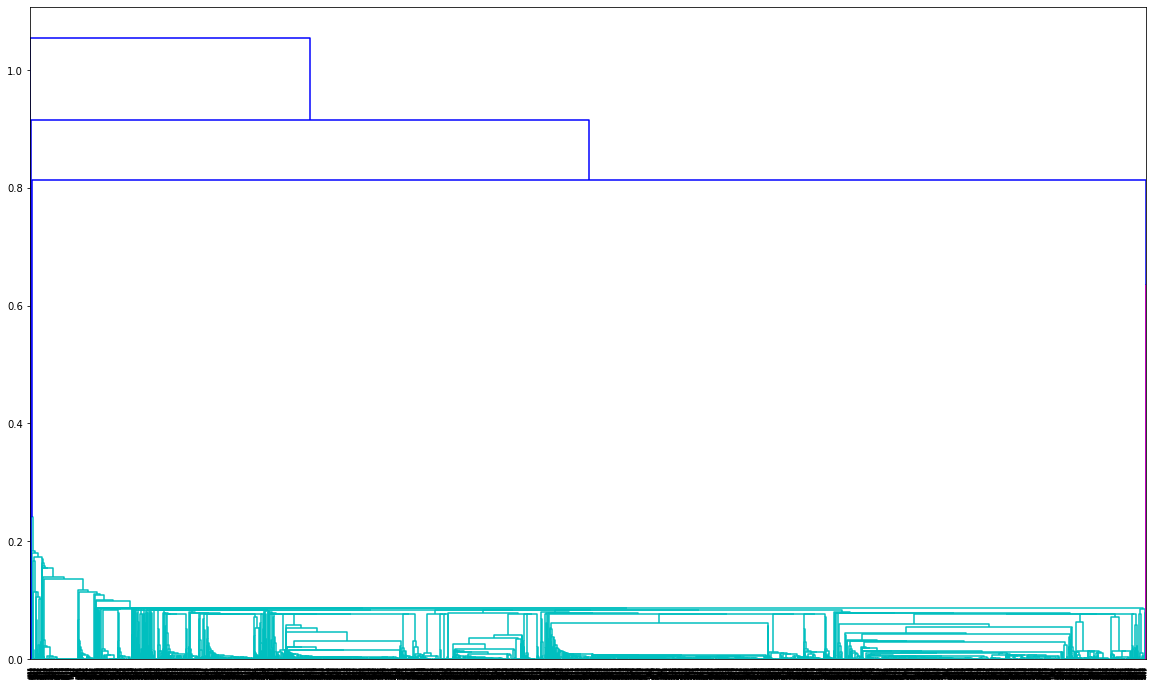

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_normal_sample, method='single'))

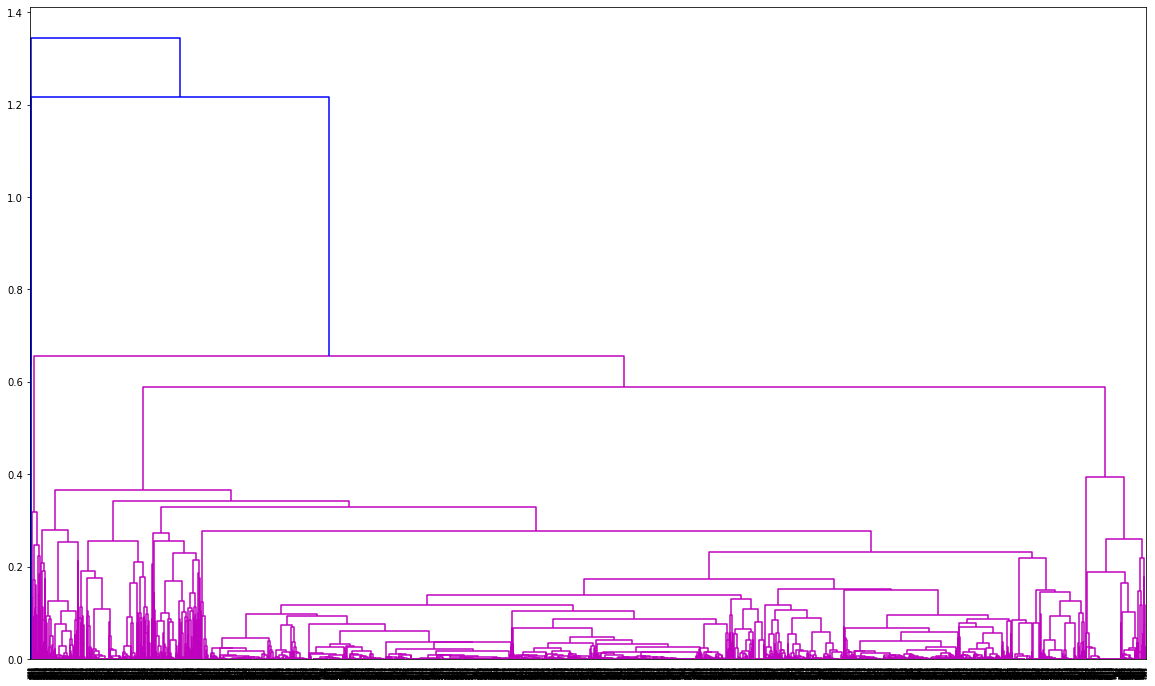

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_normal_sample, method='average'))

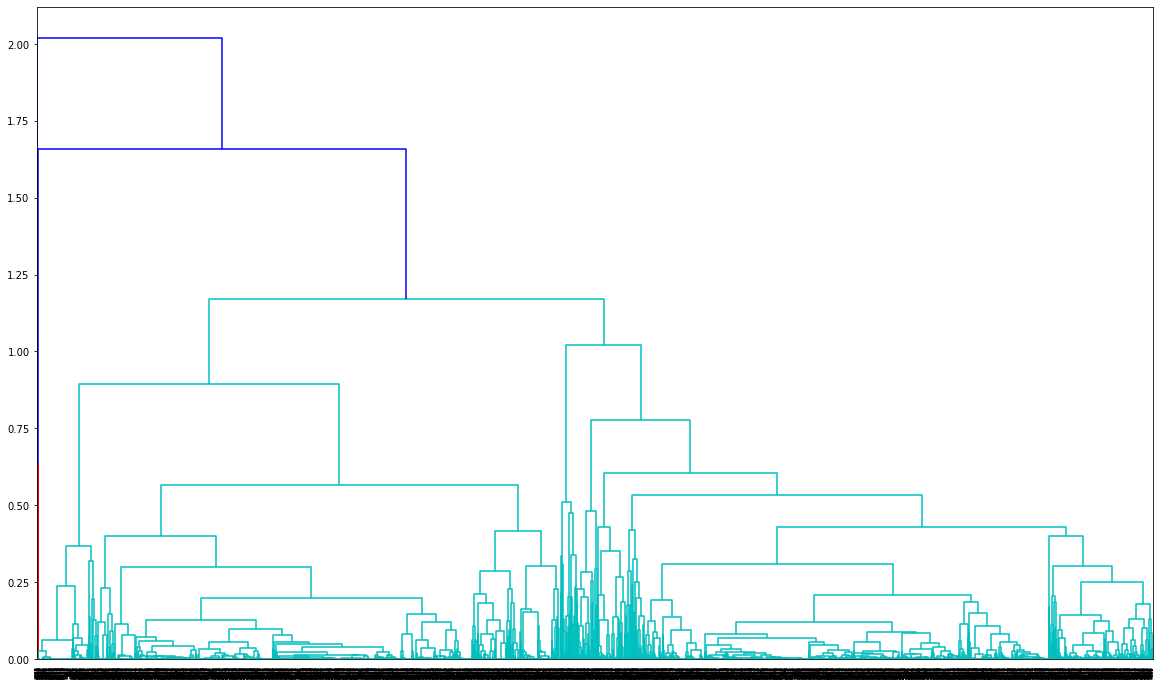

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_normal_sample, method='complete'))

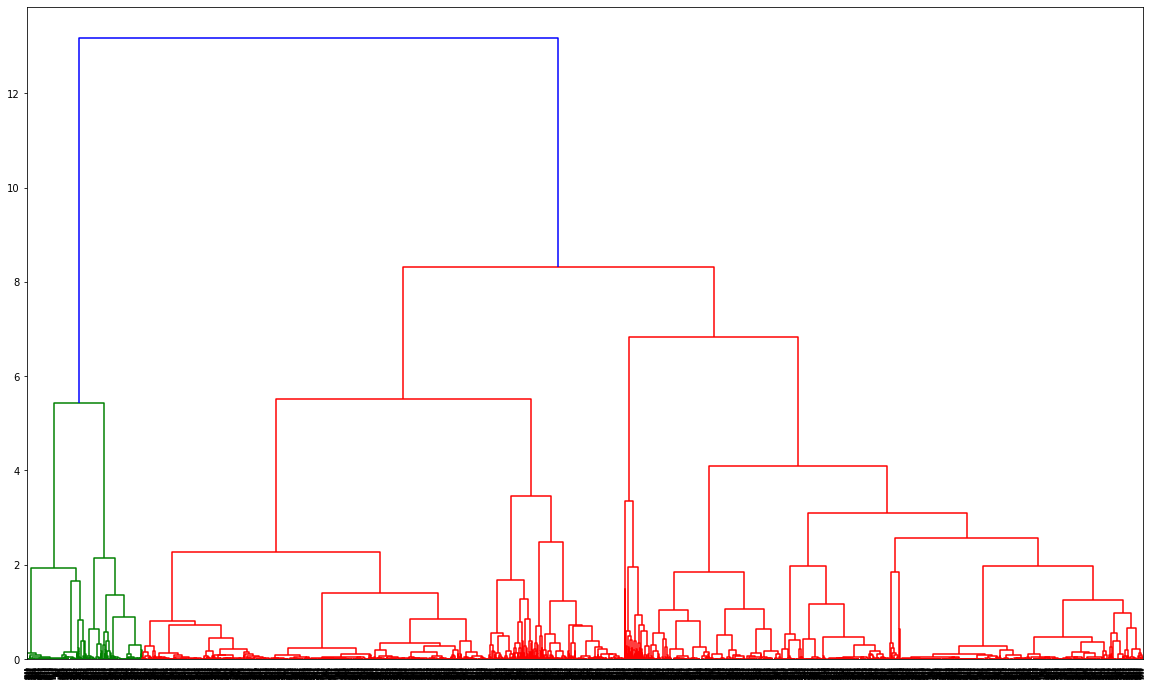

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_normal_sample, method='ward'))

Attack

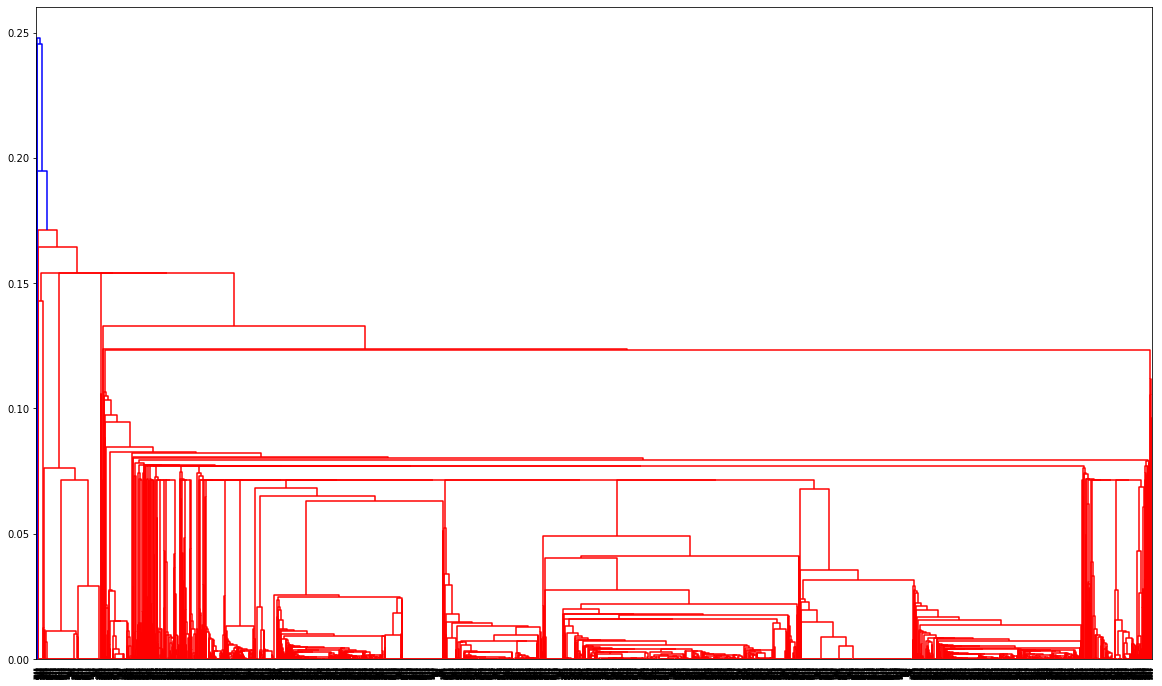

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_attack_sample, method='single'))

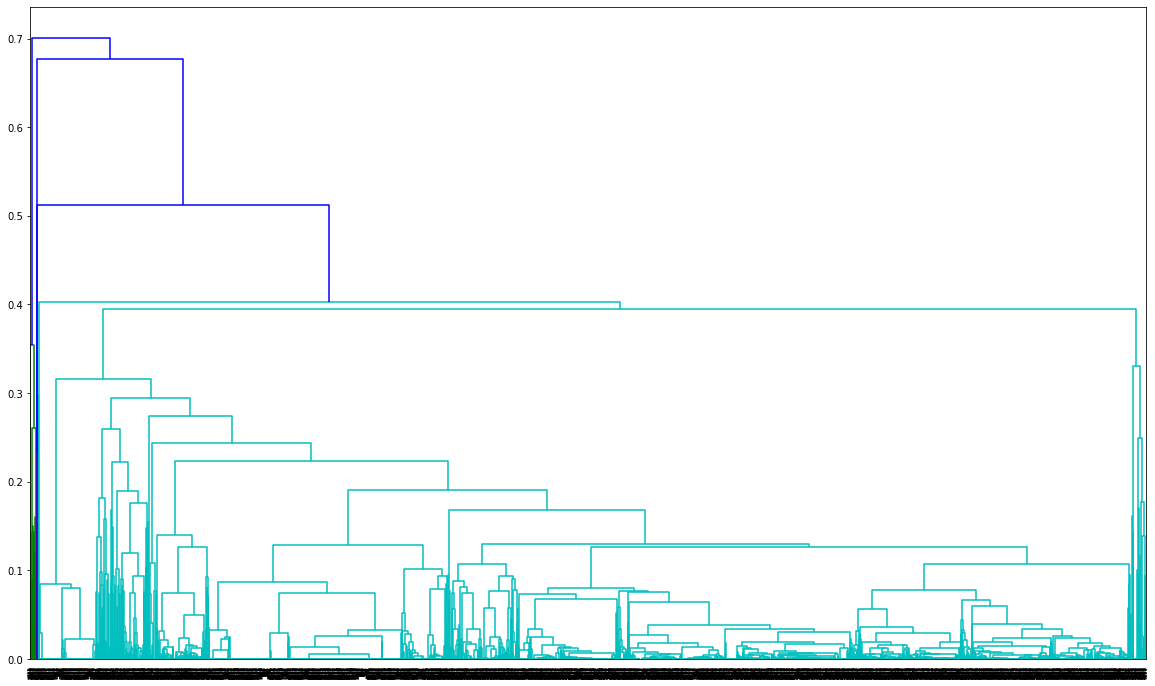

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_attack_sample, method='average'))

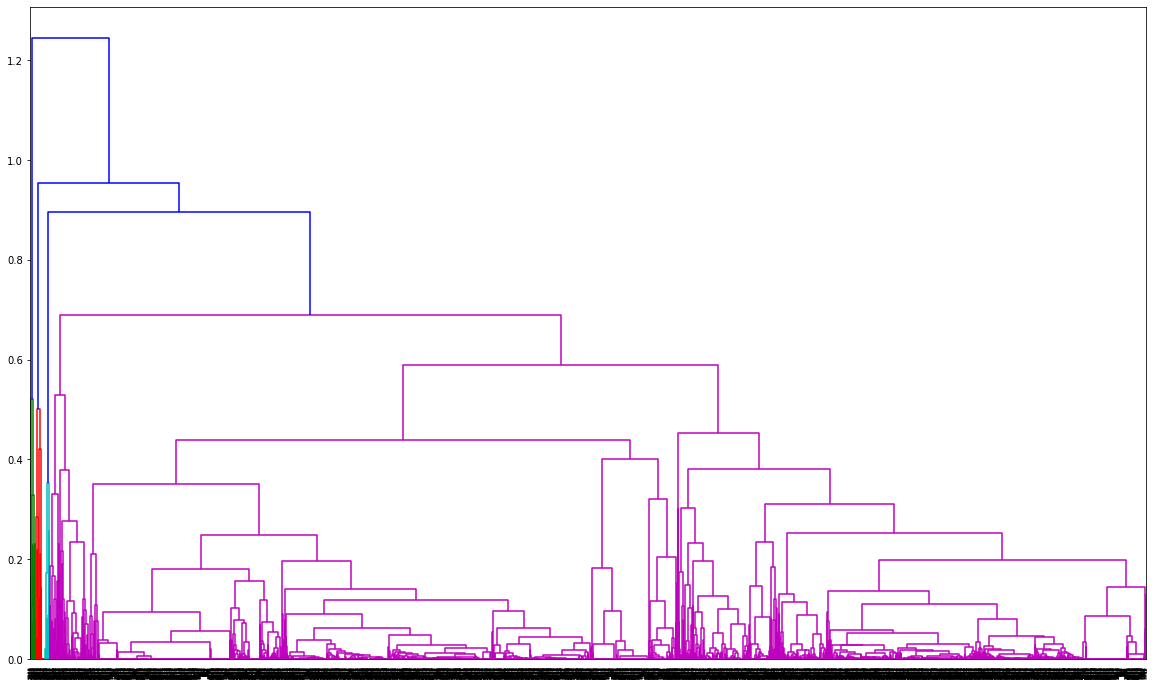

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_attack_sample, method='complete'))

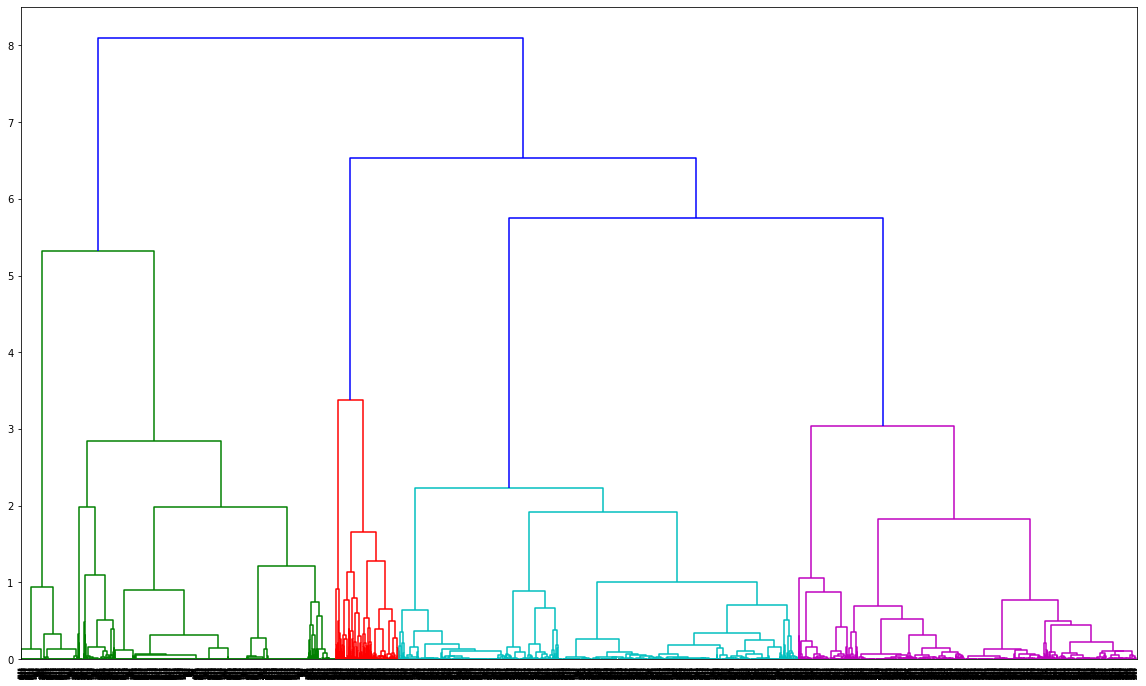

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_attack_sample, method='ward'))

Both

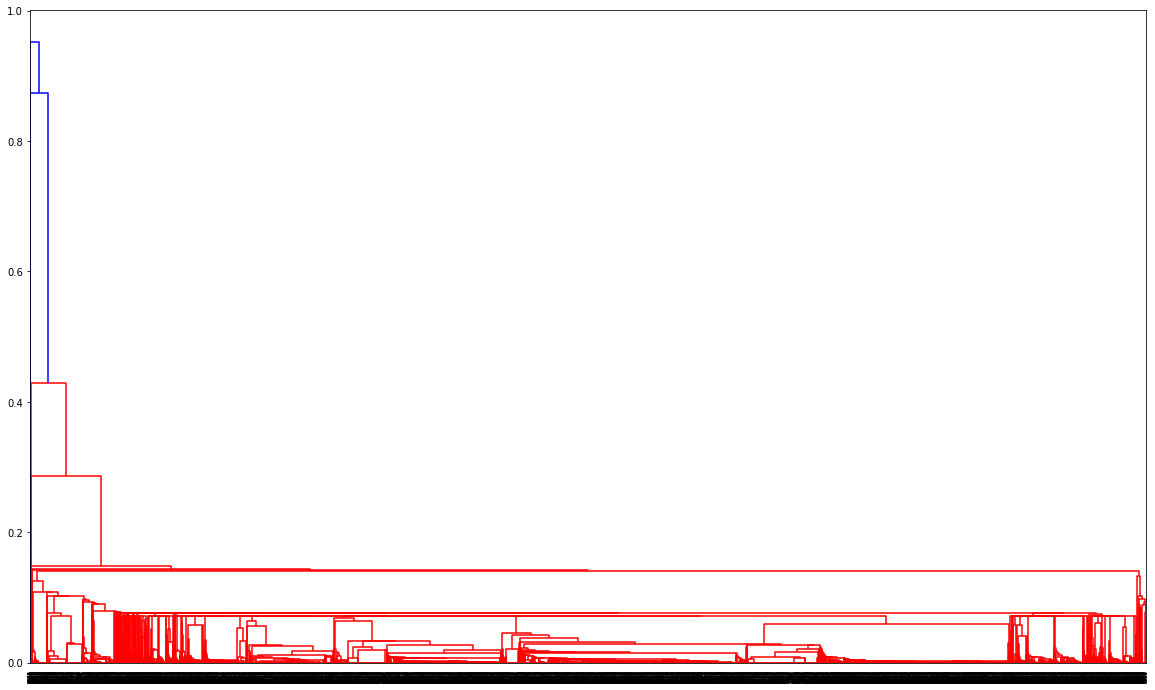

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_both_sample, method='single'))

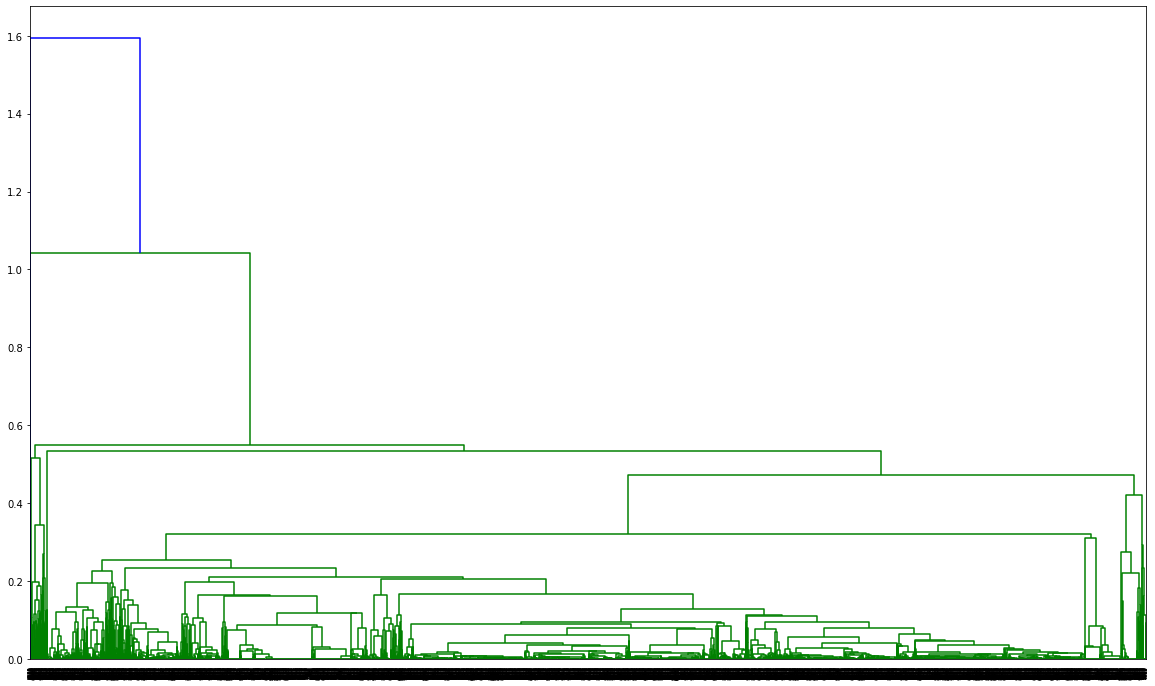

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_both_sample, method='average'))

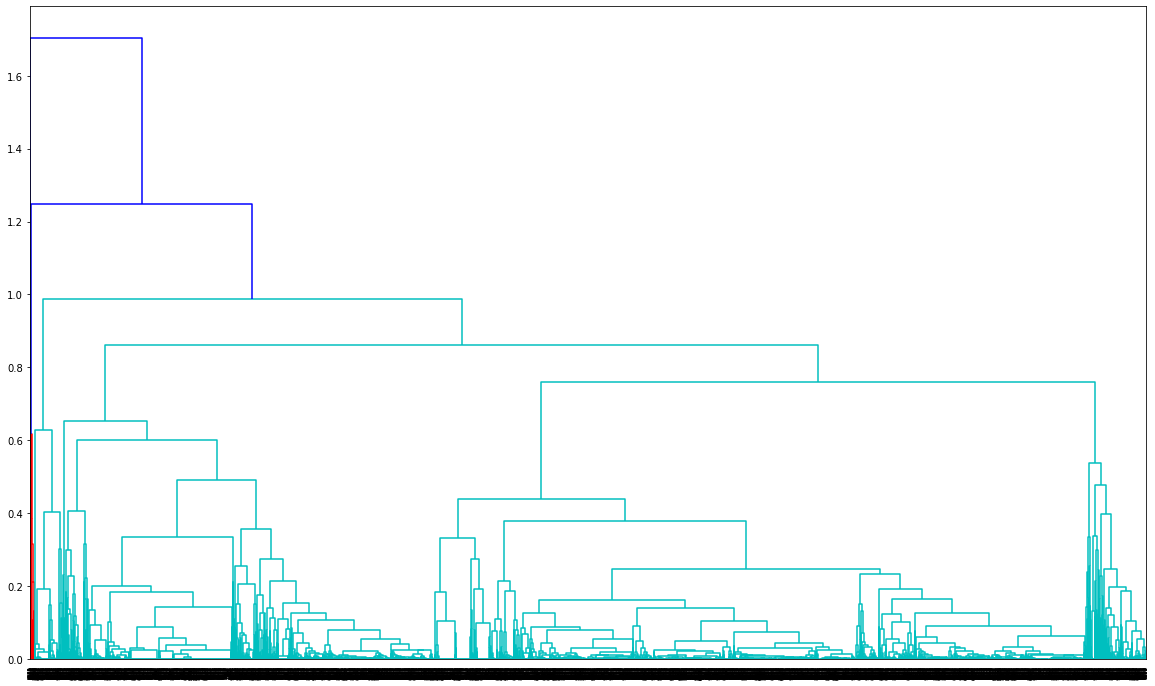

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_both_sample, method='complete'))

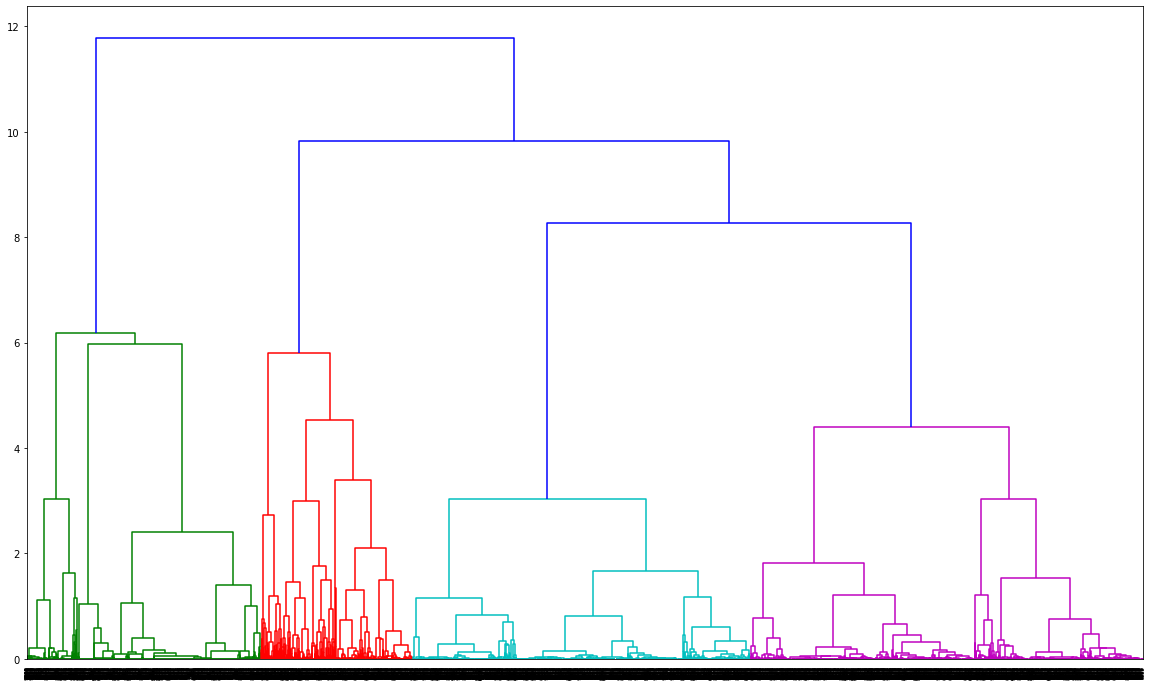

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_both_sample, method='ward'))